In [94]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [95]:
file_path = 'final_data/citibike_weather_merged_2020_to_2025.csv'
citibike_df = pd.read_csv(file_path)

citibike_df

,time,ride_count,avg_ride_duration_min,temperature_2m,relative_humidity_2m,windspeed_10m,precipitation,cloudcover,rain,snowfall,snow_depth,winddirection_10m
0,2020-01-01 00:00:00,512,75.237051,4.3,75,17.7,0.0,40,0.0,0.0,0.0,274
1,2020-01-01 01:00:00,639,37.530957,2.9,75,18.4,0.0,2,0.0,0.0,0.0,272
2,2020-01-01 02:00:00,484,19.216176,1.8,77,17.3,0.0,0,0.0,0.0,0.0,270
3,2020-01-01 03:00:00,261,20.324312,1.4,78,17.3,0.0,0,0.0,0.0,0.0,269
4,2020-01-01 04:00:00,137,11.664175,0.9,76,18.7,0.0,25,0.0,0.0,0.0,270
...,...,...,...,...,...,...,...,...,...,...,...,...
46642,2025-04-30 19:00:00,12664,12.744457,20.3,24,12.6,0.0,86,0.0,0.0,0.0,324
46643,2025-04-30 20:00:00,8638,12.233272,18.9,28,11.3,0.0,96,0.0,0.0,0.0,323
46644,2025-04-30 21:00:00,6488,11.936519,18.9,25,9.8,0.0,78,0.0,0.0,0.0,320
46645,2025-04-30 22:00:00,4835,11.797297,17.7,30,10.3,0.0,93,0.0,0.0,0.0,329


In [96]:
citibike_df.isnull().sum()

time                     0
ride_count               0
avg_ride_duration_min    0
temperature_2m           0
relative_humidity_2m     0
windspeed_10m            0
precipitation            0
cloudcover               0
rain                     0
snowfall                 0
snow_depth               0
winddirection_10m        0
dtype: int64

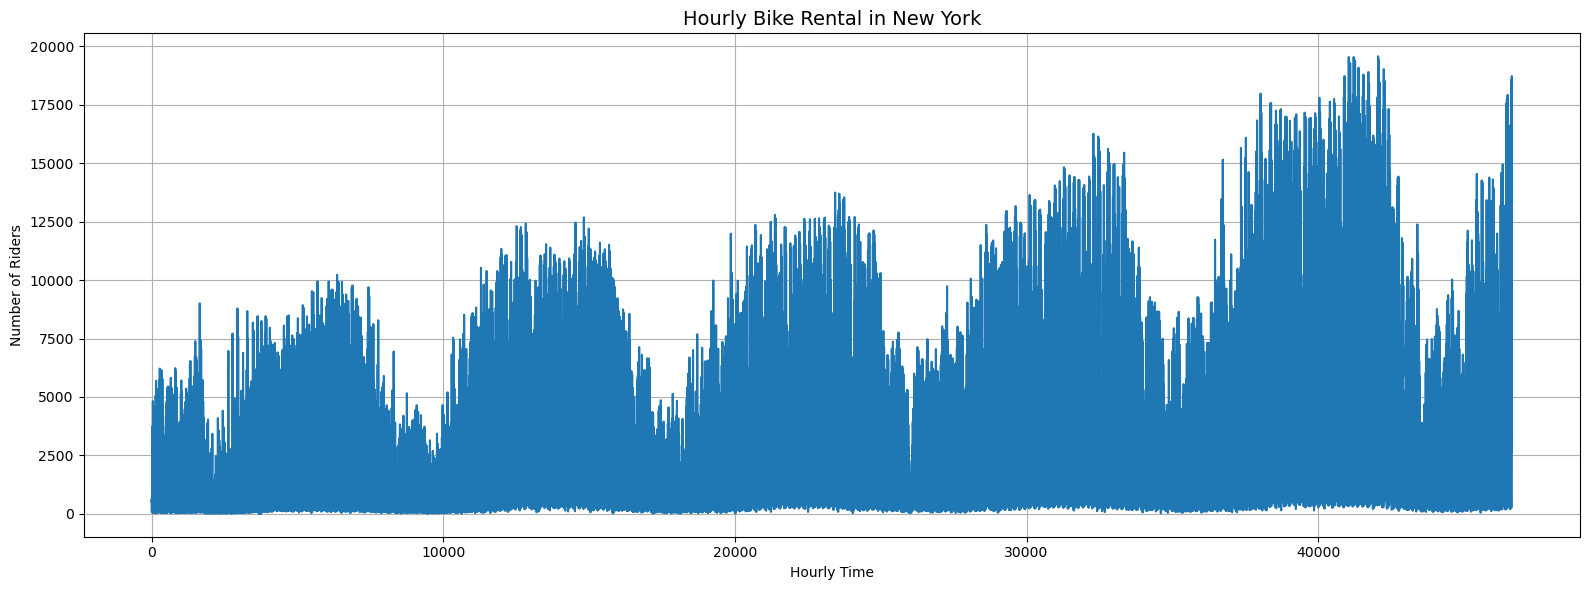

In [97]:
plt.figure(figsize=(16,6))
cbp = citibike_df['ride_count'].plot()
cbp.set_title('Hourly Bike Rental in New York', fontsize=14)
cbp.set_xlabel('Hourly Time')
cbp.set_ylabel('Number of Riders')
cbp.grid(True)

plt.tight_layout()
plt.show()

In [98]:
daily_avg = citibike_df['ride_count'].resample('D').sum()

plt.figure(figsize=(16, 6))
daily_avg.plot()
plt.title('Daily Average Bike Rentals in New York')
plt.xlabel('Date')
plt.ylabel('Average Riders per Day')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [99]:
weekly_avg = citibike_df['ride_count'].resample('W').sum()

plt.figure(figsize=(16, 6))
weekly_avg.plot()
plt.title('Weekly Average Bike Rentals in New York')
plt.xlabel('Date')
plt.ylabel('Average Riders per Week')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [100]:
citibike_df.index = pd.to_datetime(citibike_df.index)

filtered_df = citibike_df[(citibike_df.index.year >= 2020) & (citibike_df.index.year <= 2025)].copy()

filtered_df['Year'] = filtered_df.index.year
filtered_df['Month'] = filtered_df.index.month

month_totals = filtered_df.groupby(['Year', 'Month'])['ride_count'].sum().unstack(0)
month_totals.plot(figsize=(25,6))

plt.title('Seasonal Plot: Monthly Total Bike Rentals (2020-2025)', fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('Total Riders')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[m] for m in range(1, 13)])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

In [101]:
citibike_df.index = pd.to_datetime(citibike_df.index)

filtered_df = citibike_df[(citibike_df.index.year >= 2020) & (citibike_df.index.year <= 2025)].copy()

filtered_df['Year'] = filtered_df.index.year
filtered_df['DayOfYear'] = filtered_df.index.dayofyear

dayofyear_totals = filtered_df.groupby(['Year', 'DayOfYear'])['ride_count'].sum().unstack(0)
dayofyear_totals = dayofyear_totals.rolling(window=21, min_periods=1).mean()

dayofyear_totals.plot(figsize=(25,6))

plt.title('Seasonal Plot: Daily Total Bike Rentals (2020-2025)', fontsize=14)
plt.xlabel('Day of Year')
plt.ylabel('Total Riders')
plt.xticks(
    ticks=[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot